In [1]:
import os
import sys
import itertools
import math
import logging
import json
import re
import random
from collections import OrderedDict
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib.lines as lines
from matplotlib.patches import Polygon

# Root directory of the project
ROOT_DIR = os.path.abspath("../../")

# Import Mask RCNN
sys.path.append(ROOT_DIR)  # To find local version of the library
from mrcnn import utils
from mrcnn import visualize
from mrcnn.visualize import display_images
import mrcnn.model as modellib
from mrcnn.model import log




In [2]:
import voc
config = voc.VocConfig()
VOC_DIR = "../../VOCdevkit"  # TODO: enter value here

In [3]:
dataset = voc.VocDataset()
dataset.load_voc(VOC_DIR, "val", year='2012')
dataset.prepare()
print("Image Count: {}".format(len(dataset.image_ids)))
print("Class Count: {}".format(dataset.num_classes))
for i, info in enumerate(dataset.class_info):
    print("{:3}. {:50}".format(i, info['name']))

Image Count: 1392
Class Count: 21
  0. BG                                                
  1. aeroplane                                         
  2. bicycle                                           
  3. bird                                              
  4. boat                                              
  5. bottle                                            
  6. bus                                               
  7. car                                               
  8. cat                                               
  9. chair                                             
 10. cow                                               
 11. diningtable                                       
 12. dog                                               
 13. horse                                             
 14. motorbike                                         
 15. person                                            
 16. potted plant                                      
 17. sheep    

In [4]:
image_id = np.random.choice(dataset.image_ids)
print(image_id)
image = dataset.load_image(image_id)
class_label = dataset.load_class_label(image_id)
instance_mask = dataset.load_raw_mask(image_id, 'object_mask')
plt.figure()
plt.subplot(131)
plt.imshow(image);
plt.subplot(132)
plt.imshow(class_label);
plt.subplot(133)
plt.imshow(instance_mask);

836


In [5]:
%matplotlib inline

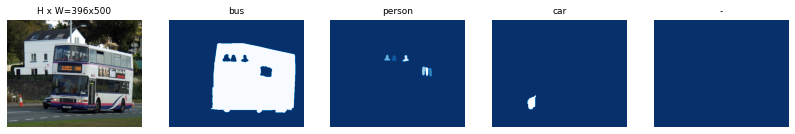

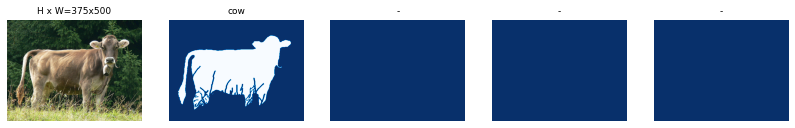

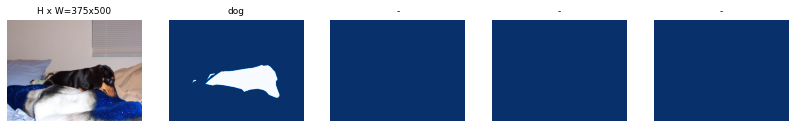

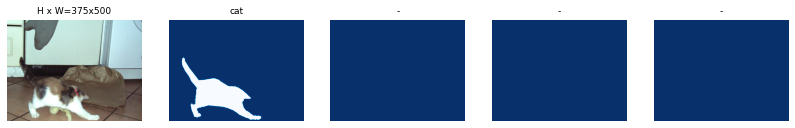

In [6]:
# Load and display random samples
image_ids = np.random.choice(dataset.image_ids, 4)
for image_id in image_ids:
    image = dataset.load_image(image_id)
    mask, class_ids = dataset.load_mask(image_id)
    visualize.display_top_masks(image, mask, class_ids, dataset.class_names)